<a href="https://colab.research.google.com/github/Struth-Rourke/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Assignment_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [153]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install --upgrade pandas
    !pip install pandas==.25

# If you're working locally:
else:
    DATA_PATH = '../data/'

  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


  Using cached https://files.pythonhosted.org/packages/bb/71/8f53bdbcbc67c912b888b40def255767e475402e9df64050019149b1a943/pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl
ERROR: pandas-profiling 2.5.0 has requirement pandas==0.25.3, but you'll have pandas 1.0.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


ERROR: Could not find a version that satisfies the requirement pandas==.25 (from versions: 0.1, 0.2b0, 0.2b1, 0.2, 0.3.0b0, 0.3.0b2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0rc1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0rc1, 0.8.0rc2, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0rc1, 0.19.0, 0.19.1, 0.19.2, 0.20.0rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0rc1, 0.21.0, 0.21.1, 0.22.0, 0.23.0rc2, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 0.25.0rc0, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0rc0, 1.0.0, 1.0.1, 1.0.2, 1.0.3)
ERROR: No matching distribution found for pandas==.25


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [155]:
# Splitting the Training set into a train and validation set
train, val = train_test_split(train, train_size = 0.80, test_size = 0.20, random_state = 42)

# Shape of Train, Val and Test
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [156]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [157]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [158]:
# Baseline: 54.32% functional; 38.43% non-functional
train['status_group'].value_counts(normalize = True)

functional                 0.542971
non functional             0.384091
functional needs repair    0.072938
Name: status_group, dtype: float64

In [0]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns = 'quantity_group')
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [160]:
import plotly.express as px
px.scatter(train, x = 'longitude', y = 'latitude', color = 'status_group', opacity = 0.1)

In [161]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns = [target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include = 'number').columns.tolist()
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [162]:
# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude = 'number').nunique()
cardinality 

date_recorded              351
funder                    1698
installer                 1923
wpt_name                 30742
basin                        9
subvillage               17232
region                      21
lga                        125
ward                      2076
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2541
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

In [163]:
# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()
categorical_features

['basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [164]:
# Combine the lists 
features = numeric_features + categorical_features
features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'basin',
 'region',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

## Most Significant **Categorical Features** (Select KBest)

**Top 10:**

extraction_type_other

extraction_type_group_other

extraction_type_class_other

payment_never pay

payment_type_never pay

quantity_enough

quantity_dry

waterpoint_type_communal standpipe

waterpoint_type_other

waterpoint_type_group_other

In [165]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func = f_regression, k = 10)
encoder = ce.OneHotEncoder(use_cat_names = True)

# Features and target
categorical_features = categorical_features
target = 'status_group'

# X Features
X_train = train[categorical_features]
X_val = val[categorical_features]

# y Target
map_dict = {'functional':1, 'non functional':0, 'functional needs repair':.5}

y_train = train[target]
y_map_train = y_train.map(map_dict)
#y_train = y_train.replace(to_replace = 'functional', value = 1)
#y_train = y_train.replace(to_replace = 'non functional', value = 0)
#y_train = y_train.replace(to_replace = 'functional needs repair', value = .5)

y_val = val[target]
y_map_val = y_val.map(map_dict)
#y_val = y_val.replace(to_replace = 'functional', value = 1)
#y_val = y_val.replace(to_replace = 'non functional', value = 0)
#y_val = y_val.replace(to_replace = 'functional needs repair', value = .5)

# OneHotEncoder
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.fit(X_val) 

# Feature Selection via Select KBest
X_train_selected = selector.fit_transform(X_train_enc, y_map_train)

# Shape of new DF
print(X_train_selected.shape)

# Features Selected
all_names = X_train_enc.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features Selected:')
for name in selected_names:
  print(name)

print('\n')
print('Features not selected:')
for name in unselected_names:
  print(name)

(47520, 10)
Features Selected:
extraction_type_other
extraction_type_group_other
extraction_type_class_other
payment_never pay
payment_type_never pay
quantity_enough
quantity_dry
waterpoint_type_communal standpipe
waterpoint_type_other
waterpoint_type_group_other


Features not selected:
basin_Internal
basin_Lake Rukwa
basin_Rufiji
basin_Wami / Ruvu
basin_Lake Victoria
basin_Lake Tanganyika
basin_Pangani
basin_Lake Nyasa
basin_Ruvuma / Southern Coast
region_Manyara
region_Dodoma
region_Mbeya
region_Morogoro
region_Mwanza
region_Shinyanga
region_Kigoma
region_Tanga
region_Iringa
region_Arusha
region_Kagera
region_Singida
region_Tabora
region_Rukwa
region_Pwani
region_Ruvuma
region_Dar es Salaam
region_Kilimanjaro
region_Lindi
region_Mtwara
region_Mara
public_meeting_True
public_meeting_False
public_meeting_nan
recorded_by_GeoData Consultants Ltd
scheme_management_Water Board
scheme_management_VWC
scheme_management_WUG
scheme_management_nan
scheme_management_Water authority
scheme_manage

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



## Most Significant **Numeric Variables** (Select KBest)

**Top 5:**

amount_tsh

gps_height

region_code

district_code

construction_year

In [166]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func = f_regression, k = 5)

# Features and target
numeric_features = numeric_features
target = 'status_group'

# X Features
X_train = train[numeric_features]
X_val = val[numeric_features]

# y Target
y_train = train[target]
y_train = y_train.replace(to_replace = 'functional', value = 1)
y_train = y_train.replace(to_replace = 'non functional', value = 0)
y_train = y_train.replace(to_replace = 'functional needs repair', value = .5)

y_val = val[target]
y_val = y_val.replace(to_replace = 'functional', value = 1)
y_val = y_val.replace(to_replace = 'non functional', value = 0)
y_val = y_val.replace(to_replace = 'functional needs repair', value = .5)

# Imputer
imputer = SimpleImputer()

X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# OneHotEncoder
#X_train_enc = encoder.fit_transform(X_train)
#X_val_enc = encoder.fit(X_val) 

# Feature Selection via Select KBest
X_train_selected = selector.fit_transform(X_train_imputed, y_train)

# Shape of new DF
print(X_train.shape)

# Features Selected
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features Selected:')
for name in selected_names:
  print(name)

print('\n')
print('Features not selected:')
for name in unselected_names:
  print(name)

(47520, 9)
Features Selected:
amount_tsh
gps_height
region_code
district_code
construction_year


Features not selected:
longitude
latitude
num_private
population


## Most Significant Features **TOTAL** (Categorical + Numeric)

**Top 15:**

region_Iringa

extraction_type_other

extraction_type_group_gravity

extraction_type_group_other

extraction_type_class_gravity

extraction_type_class_other

payment_never pay

payment_type_never pay

water_quality_unknown

quality_group_unknown

quantity_enough

quantity_dry

waterpoint_type_communal standpipe

waterpoint_type_other

waterpoint_type_group_other

In [167]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func = f_regression, k = 15)
encoder = ce.OneHotEncoder(use_cat_names = True, 
                           cols = ['basin','region','public_meeting','recorded_by','scheme_management',
                                   'permit','extraction_type','extraction_type_group','extraction_type_class',
                                   'management','management_group','payment','payment_type','water_quality',
                                   'quality_group','quantity','source','source_type',
                                   'source_class','waterpoint_type','waterpoint_type_group']
                           )


# Features and target
features = features
target = 'status_group'

# X Features
X_train = train[features]
X_val = val[features]

# y Target
y_train = train[target]
y_train = y_train.replace(to_replace = 'functional', value = 1)
y_train = y_train.replace(to_replace = 'non functional', value = 0)
y_train = y_train.replace(to_replace = 'functional needs repair', value = .5)

y_val = val[target]
y_val = y_val.replace(to_replace = 'functional', value = 1)
y_val = y_val.replace(to_replace = 'non functional', value = 0)
y_val = y_val.replace(to_replace = 'functional needs repair', value = .5)

# OneHotEncoder
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.fit(X_val) 

# Imputer
imputer = SimpleImputer()

X_train_imp = imputer.fit_transform(X_train_enc)
#X_val_imp = imputer.transform(X_val_enc)


# Feature Selection via Select KBest
X_train_selected = selector.fit_transform(X_train_imp, y_train)

# Shape of new DF
print(X_train.shape)

# Features Selected
all_names = X_train_enc.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features Selected:')
for name in selected_names:
  print(name)

print('\n')
print('Features not selected:')
for name in unselected_names:
  print(name)

(47520, 30)
Features Selected:
region_Iringa
extraction_type_other
extraction_type_group_gravity
extraction_type_group_other
extraction_type_class_gravity
extraction_type_class_other
payment_never pay
payment_type_never pay
water_quality_unknown
quality_group_unknown
quantity_enough
quantity_dry
waterpoint_type_communal standpipe
waterpoint_type_other
waterpoint_type_group_other


Features not selected:
amount_tsh
gps_height
longitude
latitude
num_private
region_code
district_code
population
construction_year
basin_Internal
basin_Lake Rukwa
basin_Rufiji
basin_Wami / Ruvu
basin_Lake Victoria
basin_Lake Tanganyika
basin_Pangani
basin_Lake Nyasa
basin_Ruvuma / Southern Coast
region_Manyara
region_Dodoma
region_Mbeya
region_Morogoro
region_Mwanza
region_Shinyanga
region_Kigoma
region_Tanga
region_Arusha
region_Kagera
region_Singida
region_Tabora
region_Rukwa
region_Pwani
region_Ruvuma
region_Dar es Salaam
region_Kilimanjaro
region_Lindi
region_Mtwara
region_Mara
public_meeting_True
public_

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



**Top 15 Total (THESE ARE ONLY CATEGORICAL VARIABLES):**

region_Iringa

extraction_type_other (x)

extraction_type_group_gravity

extraction_type_group_other (x)

extraction_type_class_gravity

extraction_type_class_other (x)

payment_never pay (x)

payment_type_never pay (x)

water_quality_unknown

quality_group_unknown

quantity_enough (x)

quantity_dry (x)

waterpoint_type_communal standpipe (x)

waterpoint_type_other (x)

waterpoint_type_group_other (x)


**Top 10:**

extraction_type_other (x)

extraction_type_group_other (x)

extraction_type_class_other (x)

payment_never pay (x)

payment_type_never pay (x)

quantity_enough (x)

quantity_dry (x)

waterpoint_type_communal standpipe (x)

waterpoint_type_other (x)

waterpoint_type_group_other (x)


**Top 5:**

amount_tsh

gps_height

region_code

district_code

construction_year


In [202]:
##### New Feature: water_per_person
## Replacing the 0 in Population with the median of 25
#print('Pop Mean', train['population'].mean()) -- 179.5
#print('Pop Median', train['population'].median()) -- 25
train['population'] = train['population'].replace(to_replace = 0, value = 25)
val['population'] = val['population'].replace(to_replace = 0, value = 25)
test['population'] = test['population'].replace(to_replace = 0, value = 25)

## Creating the New Feature
train['water_per_person'] = round(train['amount_tsh'] / train['population'], 3)
val['water_per_person'] = round(val['amount_tsh'] / val['population'], 3)
test['water_per_person'] = round(test['amount_tsh'] / test['population'], 3)

## Fill in NaN for water_per_person -- fix populations**
train['water_per_person'] = round(train['water_per_person'].fillna(0), 3)
val['water_per_person'] = round(val['water_per_person'].fillna(0), 3)
test['water_per_person'] = round(test['water_per_person'].fillna(0), 3)

##### New Feature: pump_age
## To DateTime
train['date_recorded'] = pd.to_datetime(train['date_recorded'], infer_datetime_format = True)
val['date_recorded'] = pd.to_datetime(val['date_recorded'], infer_datetime_format = True)
test['date_recorded'] = pd.to_datetime(test['date_recorded'], infer_datetime_format = True)

## Creating a new column based solely on the year
train['date_recorded_year'] = train['date_recorded'].dt.year
val['date_recorded_year'] = val['date_recorded'].dt.year
test['date_recorded_year'] = test['date_recorded'].dt.year

## Filling in 0 with median in Construction Year column
# train['construction_year'].median() -- 1986
train['construction_year'] = train['construction_year'].replace(to_replace = 0, value = 1986)
val['construction_year'] = val['construction_year'].replace(to_replace = 0, value = 1986)
test['construction_year'] = test['construction_year'].replace(to_replace = 0, value = 1986)

## Creating the New Feature
train['pump_age'] = train['date_recorded_year'] - train['construction_year']
val['pump_age'] = val['date_recorded_year'] - val['construction_year']
test['pump_age'] = test['date_recorded_year'] - test['construction_year']


## CHECK:
#train.head()
#val.head()
#test.head()


### New Feature: 


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,water_per_person,date_recorded_year,pump_age
3607,454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,Internal,Bashnet Kati,Manyara,21,1,Babati,Bashinet,160,True,GeoData Consultants Ltd,Water Board,NaN,True,1998,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0.312,2013,15
50870,510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,Internal,Lukali,Dodoma,1,6,Bahi,Lamaiti,25,True,GeoData Consultants Ltd,VWC,NaN,True,1986,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0.000,2011,25
20413,14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,Lake Rukwa,Chawalikozi,Mbeya,12,6,Mbozi,Ndalambo,25,True,GeoData Consultants Ltd,VWC,NaN,False,1986,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,other,other,non functional,0.000,2011,25
52806,47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,Rufiji,Shuleni,Mbeya,12,7,Mbarali,Chimala,25,True,GeoData Consultants Ltd,VWC,NaN,True,1986,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional,0.000,2011,25
50091,1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,Wami / Ruvu,Ngholong,Morogoro,5,1,Kilosa,Chakwale,120,True,GeoData Consultants Ltd,VWC,NaN,True,1997,other,other,other,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,shallow well,shallow well,groundwater,other,other,non functional,2.500,2011,14


In [215]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

## ATTEMPT 1: Original Features
features = ['extraction_type','extraction_type_group','extraction_type_class',
            'payment_type','quantity','waterpoint_type','waterpoint_type_group', 
            'funder', 'installer',
            'amount_tsh','gps_height','region_code','district_code','construction_year', # Numeric Features
            'pump_age','water_per_person'] # Numeric Features

target = 'status_group'

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]


# Creating a Pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True, 
                     cols = ['extraction_type','extraction_type_group','extraction_type_class',
                             'payment_type','quantity','waterpoint_type','waterpoint_type_group',
                             'funder', 'installer']),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth = 20, random_state = 42)
)


pipeline.fit(X_train, y_train)
y_pred_test_first = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.858186026936027
Validation Accuracy: 0.7707070707070707


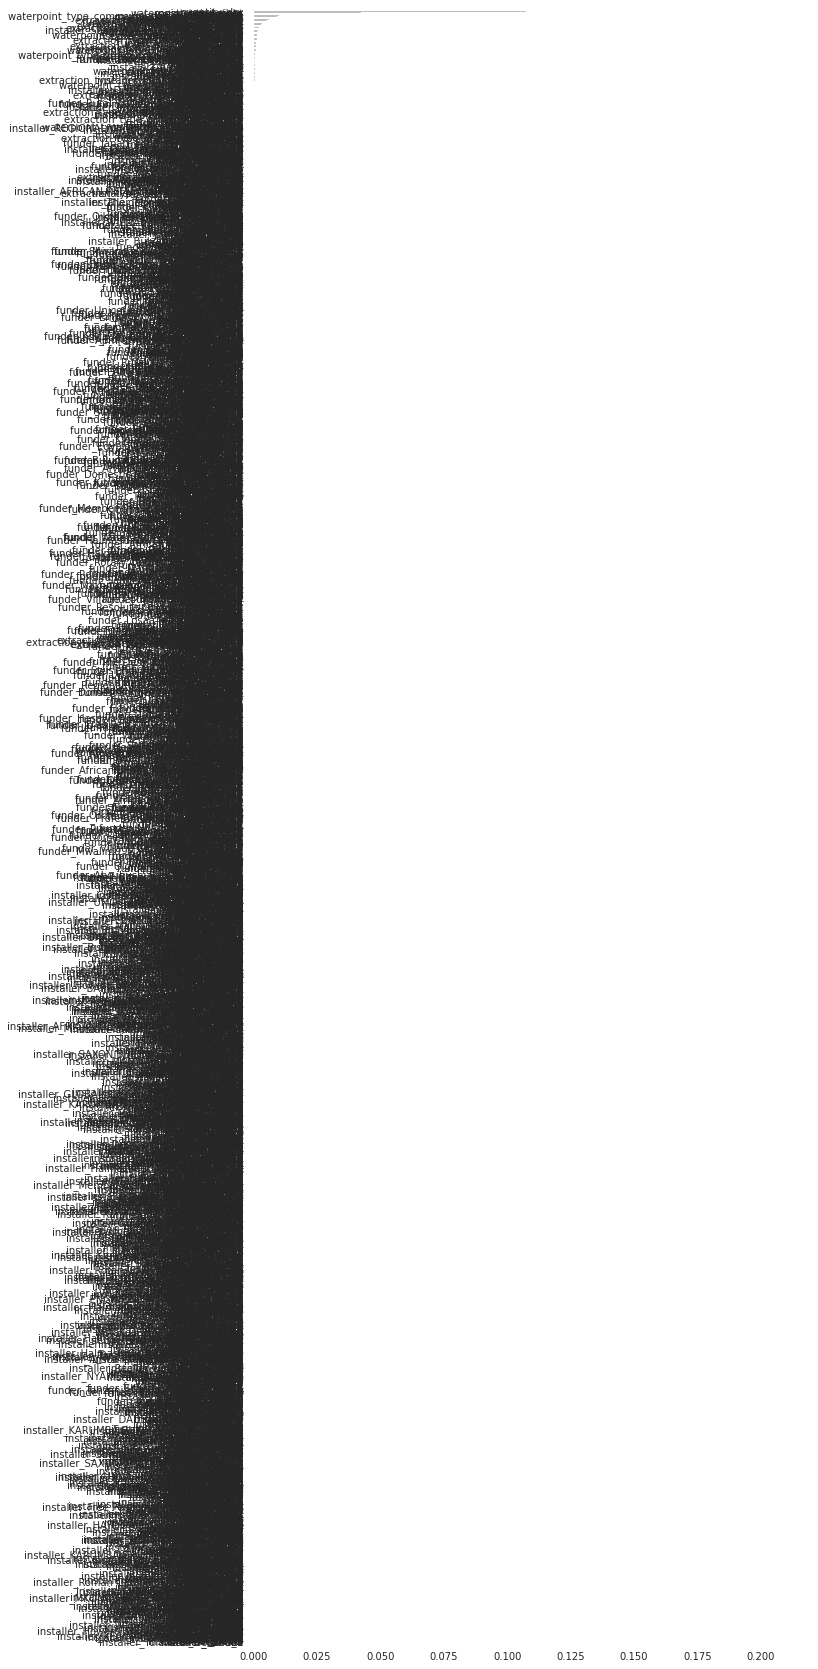

In [217]:
%matplotlib inline
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']

### AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'
### model.coef_

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize = (10, 30))
importances.sort_values().plot.barh(color = 'grey');

In [219]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


## ATTEMPT 2: New Features
features = ['region','extraction_type','extraction_type_group','extraction_type_class',
            'payment', 'payment_type', 'water_quality', 'quality_group','quantity',
            'waterpoint_type','waterpoint_type_group','amount_tsh','region_code',
            'district_code','construction_year', 'pump_age','water_per_person']

target = 'status_group'

# X Features Matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# y target vector
y_train = train[target]
y_val = val[target]

# Creating a Pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True, 
                     cols = ['region','extraction_type','extraction_type_group','extraction_type_class',
                             'payment', 'payment_type', 'water_quality', 'quality_group','quantity',
                             'waterpoint_type','waterpoint_type_group']),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth = 20, random_state = 42)
)


pipeline.fit(X_train, y_train)
y_pred_test_second = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.8383417508417509
Validation Accuracy: 0.7651515151515151


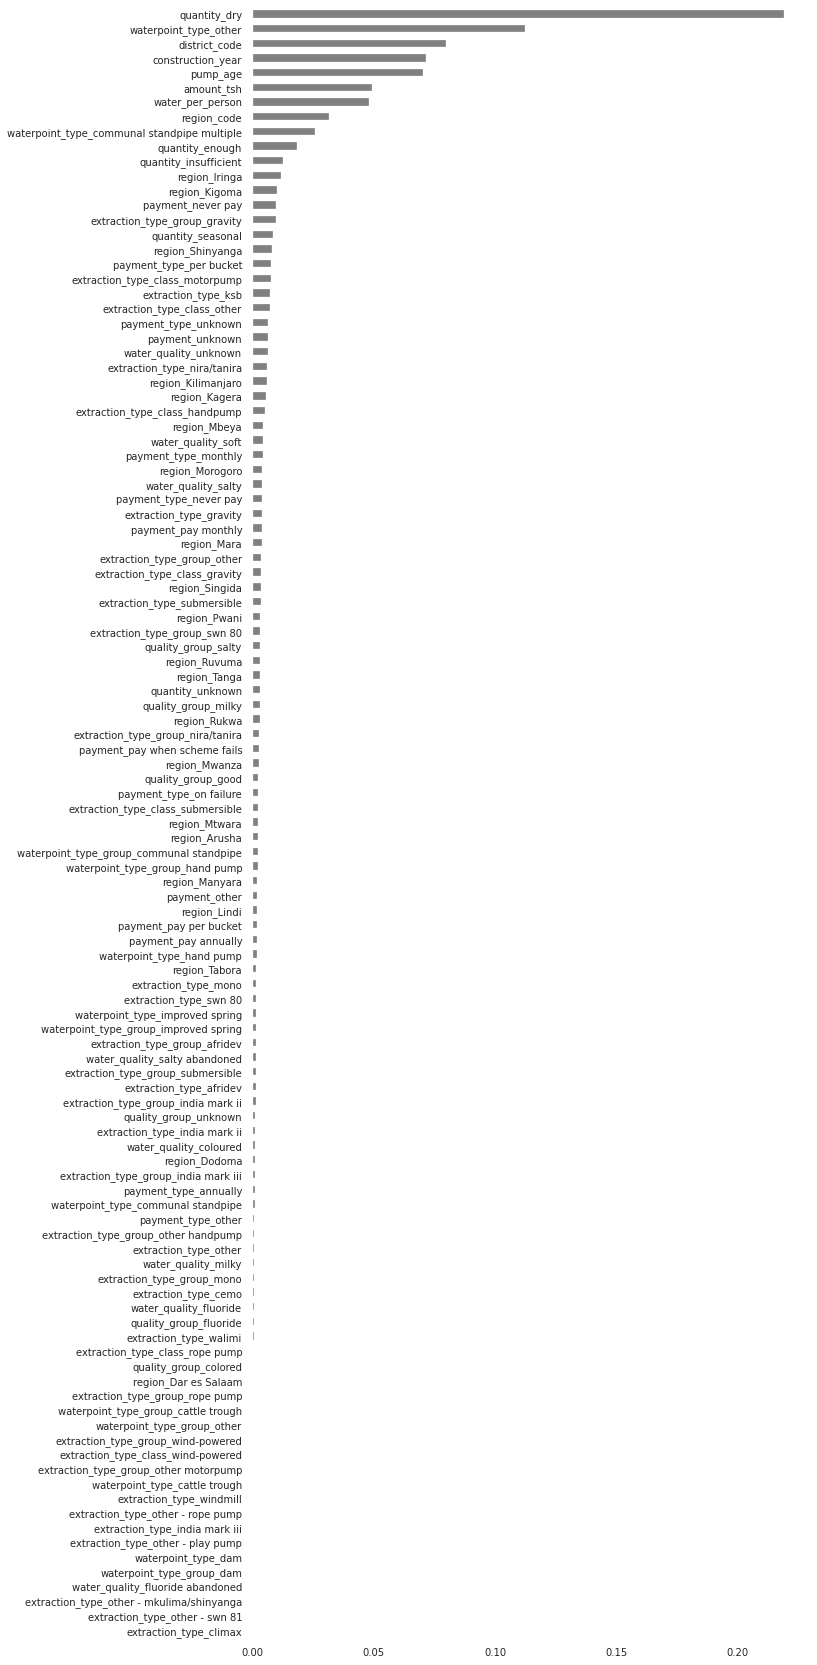

In [220]:
model = pipeline.named_steps['decisiontreeclassifier']

### AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'
### model.coef_

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize = (10, 30))
importances.sort_values().plot.barh(color = 'grey');

In [0]:
### Formatting submission: First Attempt
submission = sample_submission.copy()
submission['status_group'] = y_pred_test_first
submission.to_csv('submission-01.csv', index = False)

In [0]:
### Formatting submission: First Attempt
submission = sample_submission.copy()
submission['status_group'] = y_pred_test_first
submission.to_csv('submission-1.csv', index = False)

In [0]:
### Formatting submission: First Attempt
submission = sample_submission.copy()
submission['status_group'] = y_pred_test_second
submission.to_csv('submission-02.csv', index = False)

In [0]:
### Formatting submission: First Attempt
submission = sample_submission.copy()
submission['status_group'] = y_pred_test_second
submission.to_csv('submission-2.csv', index = False)